In [290]:
import pandas as pd
import numpy as np
import pyperclip as pc
import requests

# ___________________________________________________________________
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as ms
from sklearn import datasets, svm, metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# ____________________________________________________________________
from scipy import stats
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import chart_studio.plotly as py
import cufflinks as cf
import datetime as dt

#_____________________________________________________________________
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

from joblib import Parallel, delayed
import multiprocessing
from IPython.display import display, clear_output
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import json

#___________________________________________________________________
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
cf.go_offline()

# tls.set_credentials_file(username='marcelofprado', api_key='cftsFWfYZ7DgpGQtDuRe')
# init_notebook_mode(connected=True)

np.seterr(divide='ignore')

{'divide': 'ignore', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [387]:
resp = pd.read_csv('resp.csv')
resp.columns = ['state', 'equipments']
resp_sum = resp['equipments'].sum()
resp = resp.set_index('state', drop = True)

In [296]:
str_today = dt.date.today().strftime('%Y-%m-%d')
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-' + str_today + '.xlsx'
file = requests.get(url)
world_data = pd.read_excel(url)

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018
0,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-24,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-23,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0
4,2020-03-22,22,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
6926,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
6927,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
6928,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
6929,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


'2020-03-26'

In [252]:
us_covid_state = pd.read_csv('states-daily.csv')
us_covid_state['date'] = pd.to_datetime(us_covid_state['date'], format='%Y%m%d')
us_covid_state = us_covid_state.set_index('date', drop = True)
ny_covid = us_covid_state[us_covid_state['state'] == 'NY']
ny_covid = ny_covid.sort_values(by='date')
ny_covid['new_cases'] = ny_covid['positive'].diff().fillna(0)
ny_data = ny_covid.copy()
# ny_data

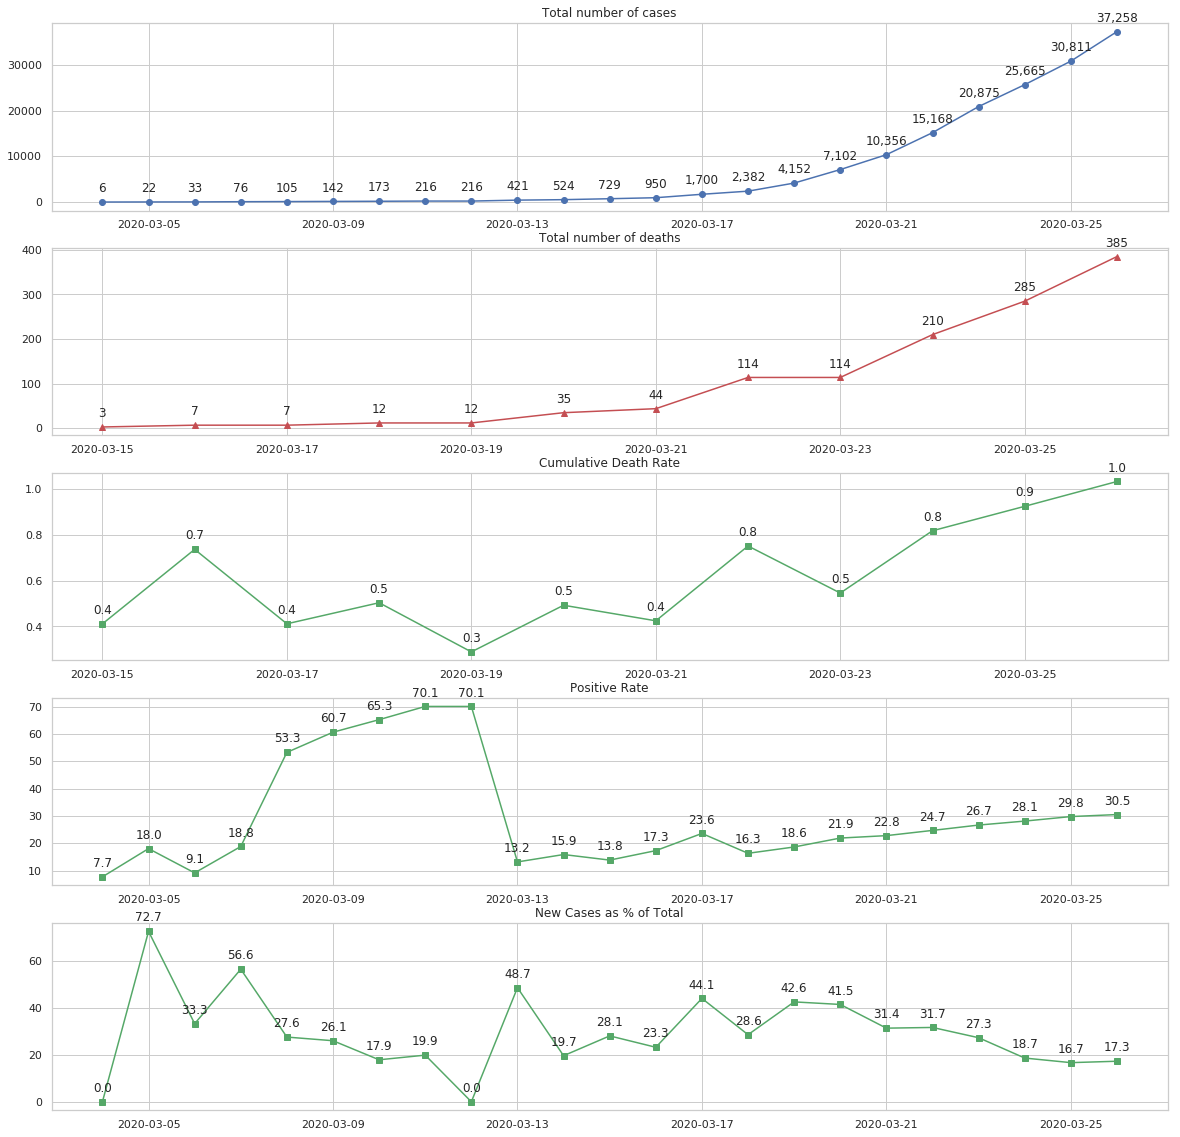

In [253]:
plt.figure(figsize = (20,20))

# plt.gca().title('Italian Cases')

plt.subplot('511')
xs = ny_data.index.values
ys = ny_data['positive']
plt.gca().set_title('Total number of cases')
plt.plot(xs, ys, 'bo-')
for x,y in zip(xs,ys):
    label = "{:,.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.subplot('512')
plt.gca().set_title('Total number of deaths')
ys = ny_data['death']
plt.plot(xs, ys, 'r^-')
for x,y in zip(xs,ys):
    label = "{:,.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.subplot('513')
plt.gca().set_title('Cumulative Death Rate')
ys = ny_data['death'] / ny_data['positive'] * 100
plt.plot(xs, ys, 'gs-')
for x,y in zip(xs,ys):
    label = "{:.1f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.subplot('514')
plt.gca().set_title('Positive Rate')
ys = ny_data['positive'] / ny_data['total'] * 100
plt.plot(xs, ys, 'gs-')
for x,y in zip(xs,ys):
    label = "{:.1f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.subplot('515')
plt.gca().set_title('New Cases as % of Total')
ys = ny_data['new_cases'] / ny_data['positive'] * 100
plt.plot(xs, ys, 'gs-')
for x,y in zip(xs,ys):
    label = "{:.1f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.savefig('./img/ny_overview')
plt.show()

In [256]:
us_state = us_covid_state[us_covid_state.index == '2020-03-25'].set_index('state', drop = True)
us_state['positive_rate'] = us_state['positive'] / us_state['total'] * 100
us_state['death_rate'] = us_state['death'] / us_state['positive'] * 100
us_state = us_state.fillna(0)

us_state_data = pd.read_csv('us_states_data.csv')
us_state_data.columns = ['state', 'population','area-miles', 'area']
us_state_data['population'] = us_state_data['population'].str.replace(',','').astype(int)
us_state_data['area-miles'] = us_state_data['area-miles'].str.replace(',','').astype(int)
us_state_data['area'] = us_state_data['area'].str.replace(',','').astype(int)
us_state_data['density'] = us_state_data['population'].astype(float) / us_state_data['area'].astype(float)
us_state_data = us_state_data.set_index('state', drop = True)

us_state = us_state.merge(us_state_data, on='state')
us_state['tests_per_1000'] = us_state['total'] / us_state['population'] * 1000
us_state['positive_per_1000'] = us_state['positive'] / us_state['population'] * 1000

In [258]:
# us_state.sort_values(by='positive_rate', ascending=False)
df_corr = us_state[['tests_per_1000','positive_per_1000','positive_rate','death_rate','density']].sort_values(by='tests_per_1000', ascending=False).corr()

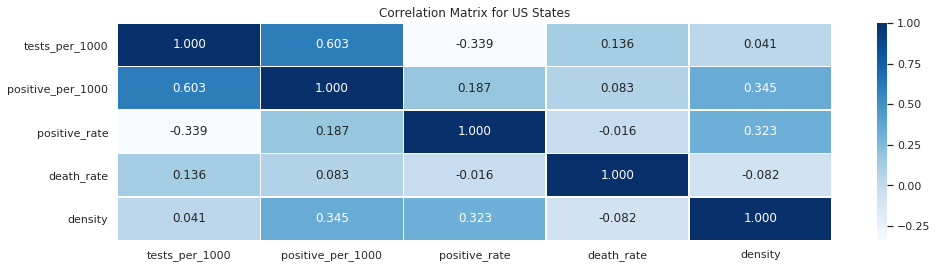

In [259]:
plt.figure(figsize = (16,4))
title = 'Correlation Matrix for US States'
# df_result = df_count.div(df_count.sum(axis = 0).sum(), axis = 1) * 100
plt.title(title)
sns.heatmap(df_corr, annot = True, linewidths = 0.5, cmap='Blues', fmt=',.3f')
plt.savefig('./img/' + title)

In [378]:
br_state = pd.read_csv('brazil_covid19.csv')
br_state['total'] = br_state['cases'] + br_state['refuses']
br_state['total_susp'] = br_state['cases'] +  br_state['refuses'] + br_state['suspects']
br_state['positive_rate'] = br_state['cases'] / br_state['total'] * 100
br_state_copy = br_state.copy()
br_state = br_state[br_state['date'] == '2020-03-25']
br_state = br_state.set_index('state', drop=True)
br_state['death_rate'] = br_state['deaths'] / br_state['cases'] * 100
br_state_data = pd.read_csv('br_states_data.csv')
br_state_data = br_state_data.drop(['Bandeira', 'Sede de governo','Alfabetização (2016)', 'Mortalidade infantil (2016)', 'Expectativa de vida (2016)'], axis = 1)
br_state_data.columns = ['state', 'state_2digits', 'area', 'population', 'density', 'gdp', 'share','gdp_per_capita', 'hdi']
br_state_data = br_state_data.set_index('state', drop=True)
br_state_data = br_state.merge(br_state_data, on='state')
br_state_data['area'] = br_state_data['area'].str.replace(',','.').str.replace('\xa0','').astype(float)
br_state_data['population'] = br_state_data['population'].str.replace(',','.').str.replace('\xa0','').astype(float)
br_state_data['gdp'] = br_state_data['gdp'].str.replace(',','').str.replace('\xa0','').astype(float)
br_state_data['gdp_per_capita'] = br_state_data['gdp_per_capita'].str.replace(',','.').str.replace('\xa0','').astype(float)
br_state_data['hdi'] = br_state_data['hdi'].str.replace(',','.').str.replace('\xa0','').astype(float)
br_state_data['density'] = br_state_data['density'].str.replace(',','.').str.replace('\xa0','').astype(float)
br_state_data['tests_per_1000'] = br_state_data['total'] / br_state_data['population'] * 1000
# br_state_data = br_state_data.set_index('state_2digits', drop = True)

In [268]:
br_state_data[['tests_per_1000','death_rate','density']].sort_values(by='tests_per_1000', ascending=False)

,tests_per_1000,death_rate,density
state,,,
Distrito Federal,0.055791,0.000000,400.73
Acre,0.028926,0.000000,4.30
Ceará,0.022554,0.000000,54.40
Rio de Janeiro,0.022428,1.621622,352.05
São Paulo,0.019516,5.568445,162.93
Santa Catarina,0.016185,0.000000,61.53
Roraima,0.015974,0.000000,1.74
Amazonas,0.013868,1.851852,2.05
Rio Grande do Sul,0.010955,0.813008,38.49


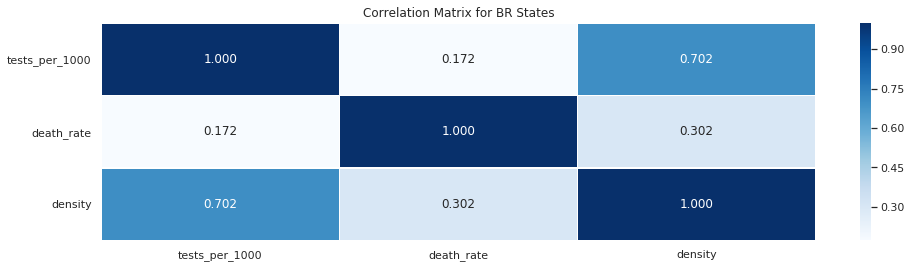

In [270]:
df_corr = br_state_data[['tests_per_1000','death_rate','density']].sort_values(by='tests_per_1000', ascending=False).corr()
plt.figure(figsize = (16,4))
title = 'Correlation Matrix for BR States'
# df_result = df_count.div(df_count.sum(axis = 0).sum(), axis = 1) * 100
plt.title(title)
sns.heatmap(df_corr, annot = True, linewidths = 0.5, cmap='Blues', fmt=',.3f')
plt.savefig('./img/' + title)

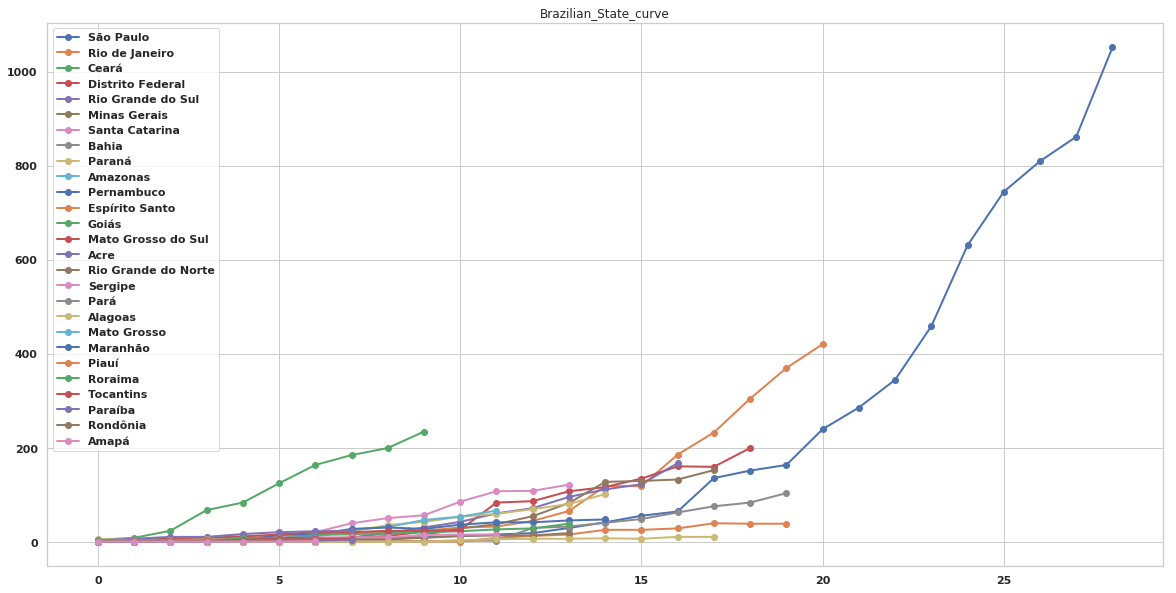

In [400]:
pt_br_state = br_state_copy.pivot_table(values = 'cases', index = 'state', columns = 'date', aggfunc='sum')
pt_br_state = pt_br_state.sort_values(by=str_today, ascending = False)

df = pd.DataFrame()
for i in pt_br_state.iterrows():
    temp = i[1]
    temp = temp.loc[temp > 0].reset_index(drop = True)
    df = df.append(temp)
    
df = df
    
plt.figure(figsize = (20,10))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)
title = 'Brazilian_State_curve'
plt.title(title)
for i in df.T.iteritems():
    temp = i[1].dropna()
    plt.plot(temp.index, temp, label = i[1].name, linewidth=2, marker='o')
    plt.legend()
    
plt.savefig('./img/' + title)

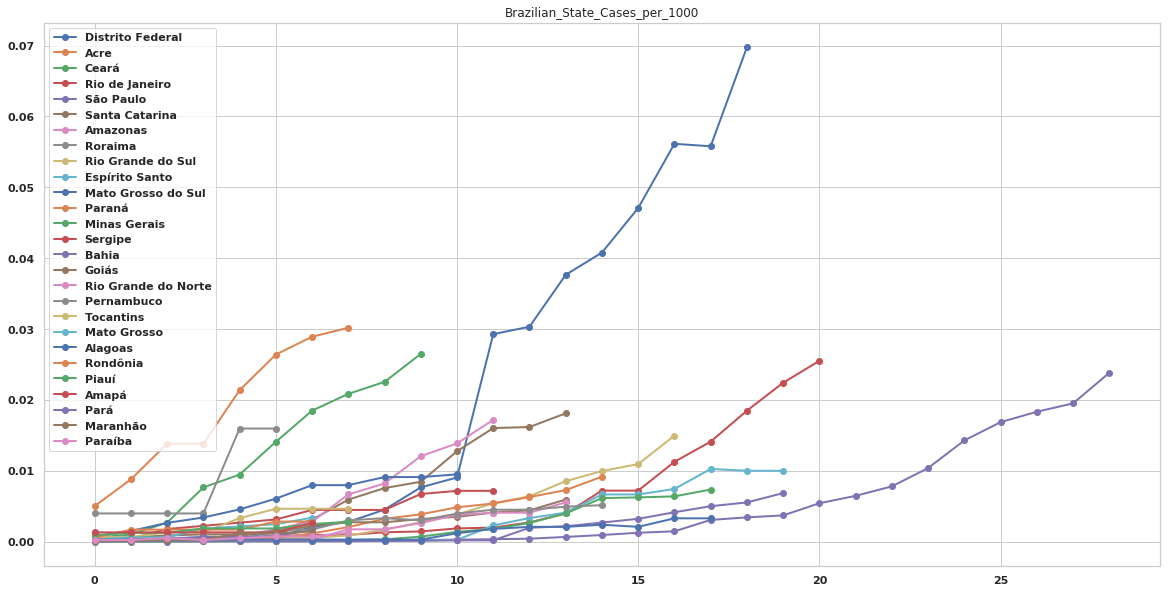

In [401]:
pt_br_state_adj =  pt_br_state.div(br_state_data['population'], axis = 0) * 1000
pt_br_state_adj = pt_br_state_adj.sort_values(by=str_today, ascending = False)

df = pd.DataFrame()
for i in pt_br_state_adj.iterrows():
    temp = i[1]
    temp = temp.loc[temp > 0].reset_index(drop = True)
    df = df.append(temp)
    
df = df
    
plt.figure(figsize = (20,10))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)
title = 'Brazilian_State_Cases_per_1000'
plt.title(title)
for i in df.T.iteritems():
    temp = i[1].dropna()
    plt.plot(temp.index, temp, label = i[1].name, linewidth=2, marker='o')
    plt.legend()
    
plt.savefig('./img/' + title)

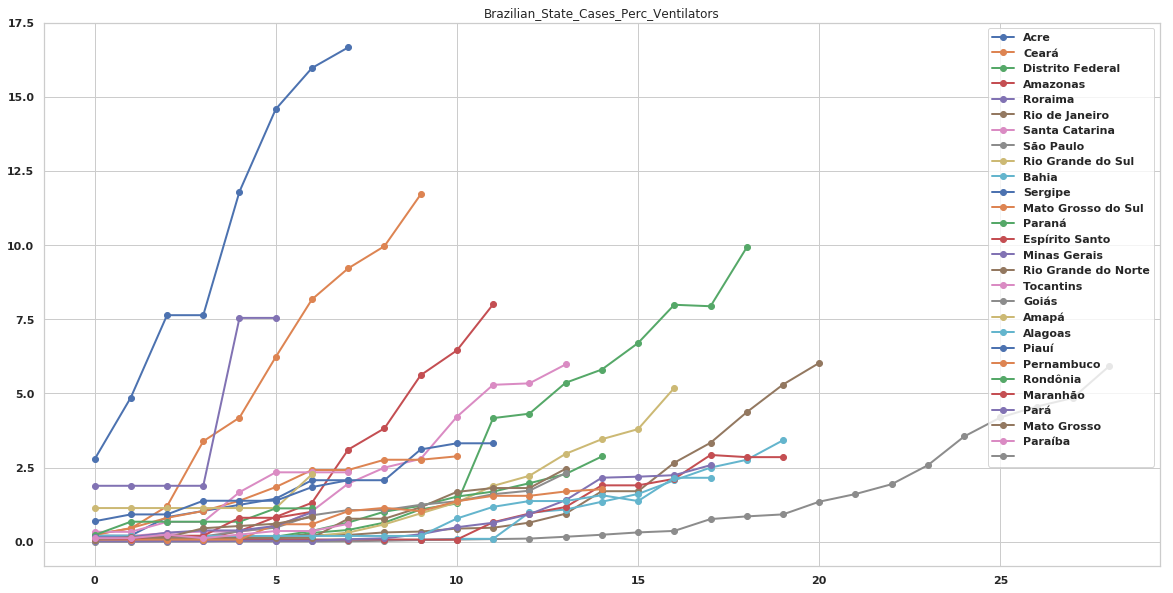

In [402]:
pt_br_state_adj =  pt_br_state.div(resp['equipments'], axis = 0) * 100
pt_br_state_adj = pt_br_state_adj.sort_values(by=str_today, ascending = False)

df = pd.DataFrame()
for i in pt_br_state_adj.iterrows():
    temp = i[1]
    temp = temp.loc[temp > 0].reset_index(drop = True)
    df = df.append(temp)
    
df = df
    
plt.figure(figsize = (20,10))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)
title = 'Brazilian_State_Cases_Perc_Ventilators'
plt.title(title)
for i in df.T.iteritems():
    temp = i[1].dropna()
    plt.plot(temp.index, temp, label = i[1].name, linewidth=2, marker='o')
    plt.legend()
    
plt.savefig('./img/' + title)

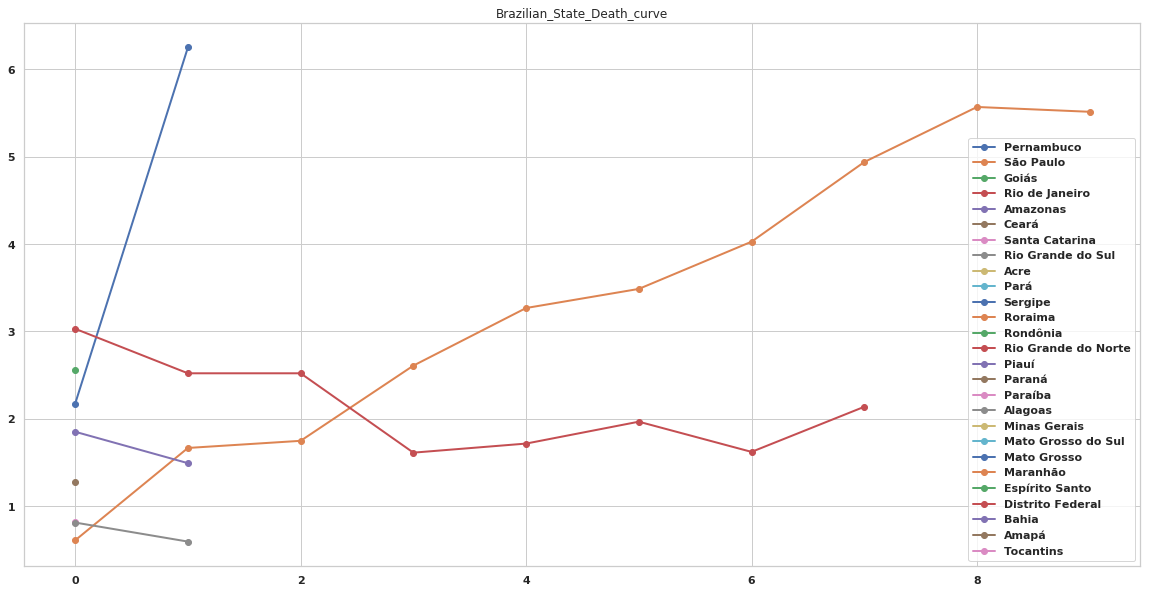

In [405]:
pt_br_state_death  = br_state_copy.pivot_table(values = 'deaths', index = 'state', columns = 'date', aggfunc='sum') / pt_br_state * 100

pt_br_state_death = pt_br_state_death.sort_values(by=str_today, ascending = False)

df = pd.DataFrame()
for i in pt_br_state_death.iterrows():
    temp = i[1]
    temp = temp.loc[temp > 0].reset_index(drop = True)
    df = df.append(temp)
    
df = df
    
plt.figure(figsize = (20,10))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)
title = 'Brazilian_State_Death_curve'
plt.title(title)
for i in df.T.iteritems():
    temp = i[1].dropna()
    plt.plot(temp.index, temp, label = i[1].name, linewidth=2, marker='o')
    plt.legend()
    
plt.savefig('./img/' + title)